Multiple Analysis of Variance

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.multivariate.manova import MANOVA
# import the data directly from s3 bucket
data = pd.read_csv('/content/manova_data_plant_growth.csv')

# Print the data
data

,Treatment,Height,Width,Weight
0,1,15.8,3.9,29.4
1,1,15.1,3.8,29.9
2,1,14.8,4.1,30.2
3,1,14.4,4.7,30.1
4,1,15.1,3.7,30.9
5,2,15.7,4.8,31.2
6,2,15.9,4.3,31.4
7,2,15.4,4.5,31.8
8,2,16.7,5.4,32.4
9,2,16.9,5.8,32.6


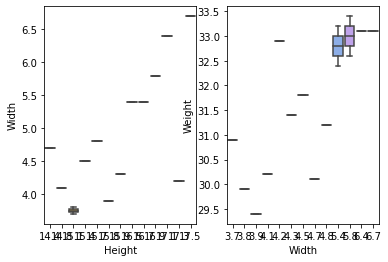

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=2)
sns.boxplot(data=data, x="Height", y="Width", ax=axs[0])
sns.boxplot(data=data, x="Width", y="Weight", ax=axs[1])
plt.show()

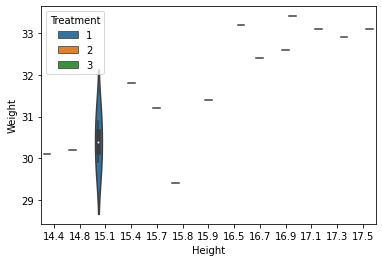

In [38]:
sns.violinplot(data=data, x="Height", y="Weight", hue="Treatment")

In [40]:
# Compute the correlation matrix
corr = data.corr()
corr

,Treatment,Height,Width,Weight
Treatment,1.000000,0.867686,0.729081,0.940328
Height,0.867686,1.000000,0.719924,0.853147
Width,0.729081,0.719924,1.000000,0.770022
Weight,0.940328,0.853147,0.770022,1.000000


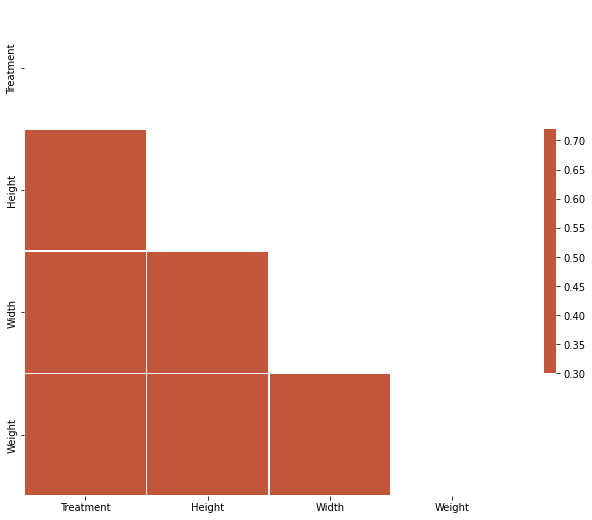

In [42]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [20]:
maov = MANOVA.from_formula('Height + Width + Weight~ Treatment',data=data)
print(maov.mv_test())
# output

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value   Num DF  Den DF  F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda   0.0014 3.0000 11.0000 2545.4089 0.0000
         Pillai's trace   0.9986 3.0000 11.0000 2545.4089 0.0000
 Hotelling-Lawley trace 694.2024 3.0000 11.0000 2545.4089 0.0000
    Roy's greatest root 694.2024 3.0000 11.0000 2545.4089 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
           Treatment        Value  Num DF  Den DF F Value Pr > F
----------------------------------------------------------------
              Wilks' lambda 0.0998 3.0000 11.0000 33.0802 0.0000
             Pillai's trace 0.9002 3.0000 11.

The Pillai’s Trace test statistics is statistically significant [Pillai’s Trace = 0.9002, F(3, 11) = 33.0802, p < 0.001] and indicates that the treatment outcome has a statistically significant association with the three variables.

Linear discriminant analysis is not just a dimension reduction tool, but also a robust classification method.
- Linear discriminant analysis is used as a tool for classification, dimension reduction, and data visualization.
- When tackling real-world classification problems, LDA is often the benchmarking method before other more complicated and flexible ones are employed.

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
X=data[['Weight', 'Width', 'Height']]
y=data['Treatment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
# create the lda model
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train, y_train)
ytest = np.array(y_test)

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
post_hoc = lda().fit(X=X, y=y)

In [27]:
# get prior probabilities of groups:
post_hoc.priors_

array([0.33333333, 0.33333333, 0.33333333])

In [28]:
# get group means
post_hoc.means_

array([[30.1 ,  4.04, 15.04],
       [31.88,  4.96, 16.12],
       [33.14,  5.7 , 17.06]])

In [29]:
# get coefficients of linear discriminants
post_hoc.scalings_

array([[ 1.79365123, -1.30001036],
       [-0.09653954,  0.36310872],
       [ 0.75212731,  1.66738146]])

In [30]:
# get Proportion of trace (variance explained by each of the selected components)
post_hoc.explained_variance_ratio_

array([0.99897885, 0.00102115])

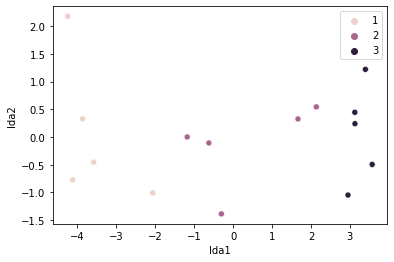

In [34]:
# plot 
from pandas import DataFrame
X_new = pd.DataFrame(lda().fit(X=X, y=y).transform(X), columns=["lda1", "lda2"])
X_new["Treatment"] = data["Treatment"]
sns.scatterplot(data=X_new, x="lda1", y="lda2", hue=data.Treatment.tolist())
plt.show()

The LDA scatter plot discriminates against multiple treatments based on the three dependent variables. The three treatments are well separated.